In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli
from scipy.stats import binom 
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import nbinom

In [2]:
df = pd.read_csv('juego-azar.csv',sep=';')
df.head()

,bola,color,numero
0,1,blanco,1
1,2,negro,1
2,3,negro,1
3,4,negro,1
4,5,blanco,2


# Probabilidad Bayesiana

In [3]:
df.numero.value_counts()

1    4
3    3
2    3
Name: numero, dtype: int64

In [4]:
#Probabilidad de que la bola contente el número 1
p1 = 4/10
#Probabilidad de que la bola contente el número 2
p2 = 3/10
#Probabilidad de que la bola contente el número 3
p3 = 3/10

In [5]:
df.groupby(['color','numero']).size()

color   numero
blanco  1         1
        2         1
        3         2
negro   1         3
        2         2
        3         1
dtype: int64

In [6]:
pd.crosstab(index=df.color,columns=df.numero,margins=True)

numero,1,2,3,All
color,,,,
blanco,1,1,2,4
negro,3,2,1,6
All,4,3,3,10


Con el teorema de Bayes, podemos calcular la probabilidad de B (Que sea blanco) p(b), con sus probabilidades condicionales
$P(B) = P(B/1)*P(1)+P(B/2)*P(2)+P(B/3)*P(3)$


In [7]:
pb = 1/4*p1 + 1/3*p2 + 2/3*p3
pb

0.4

Comprobamos 

In [8]:
df.groupby(['color']).size()/len(df)

color
blanco    0.4
negro     0.6
dtype: float64

Calculamos la probabilidad de sacar una pelota blanca dado que tenga el número 2.

$$P(B/2) = \frac{P(2/B)P(B)}{P(2)}$$

In [9]:
pd.crosstab(index=df.color,columns=df.numero,margins=True)

numero,1,2,3,All
color,,,,
blanco,1,1,2,4
negro,3,2,1,6
All,4,3,3,10


In [10]:
pb_2 = (1/4*pb) / (3/10)
pb_2

0.33333333333333337

# Ditribución discretas

In [12]:
n = 8
p = 0.3

Siendo $n$ el número de intentos y $p$ la probabilidad. Lo que nos calcula la dist binomial es que en intento tendremos el exito. 

Solo calcula éxito , o fracaso $p$ ó $1-p$

In [16]:
# Calcular el valor esperado
media = np.average(x,weights=y)
#media = n*p


#Calcular la varianza
varianza = np.average((x - media )**2 , weights=y)
#varianza = n*p*(1-p)

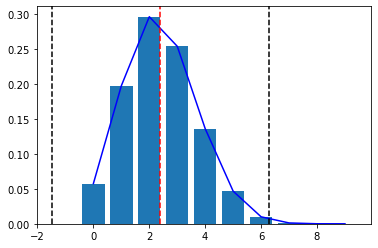

In [17]:
x = [i for i in range(0,10)]
y = [binom(n,p).pmf(i) for i in x ]
plt.bar(x,y)
plt.plot(x,y,c='b',label='Distribution')
plt.axvline(media,c='r',linestyle='--',label='Media')
plt.axvline(media + 3*np.sqrt(n*p*(1-p)) ,c='k',linestyle='--',label='Media + $3\sigma$')
plt.axvline(media - 3*np.sqrt(varianza) ,c='k',linestyle='--',label='Media - $3\sigma$')
plt.show()

<h3>Curtosis:</h3>
<p>
Nos da indicios de como están distribuidos los datos.
</p>

<ul>
  <li>Si los datos son mas uniformes y se acercan mas a la media entonces estamos en presencia de una distribución <b>leptocúrtica</b> (coeficiente de curtosis >0)</li>
  <li>Si los datos están muy dispersos y la curva no presenta una cima pronunciada, estamos en presencia de una distribución <b>platicúrtica</b> (coef. de curtosis \< 0) </li>
  <li>Si los datos presentan un comportamientos normal la curtosis es igual a 0 <b>(mesocúrtica)</b></li>
</ul>

<img src=https://static.platzi.com/media/user_upload/image040-7e4fefee-6e54-493e-aeac-6ef189b6b66f.jpg><img>

<h3>Asimetría:</h3>
<p>
La simetría hace referencia a que tan iguales son las dos partes de la distribución.
</p>
<p>
Si la distribución es simétrica sus Medidas de tendencia central (media, mediana y moda) serán iguales.
</p>
<img src=https://static.platzi.com/media/user_upload/asimetria-064f0381-f09d-4054-9129-f7104ca76abd.jpg></img>

In [19]:
mean, var, skew, kurt = binom.stats( p=0.3, n = 100,moments = "mvsk")
# skew = Asimetria
# Kurt = Curtosis

In [25]:
print('Simetria = '+ str(skew))
print('Curtosis = '+ str(kurt))

Simetria = 0.08728715609439695
Curtosis = -0.012380952380952371


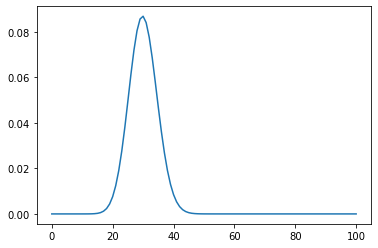

In [33]:
x = np.arange(0,101)
y = binom.pmf(x,p=0.3,n=100)
plt.plot(x,y)

### Bernoulli 

In [50]:
data = bernoulli.rvs(p=0.3, size=100)

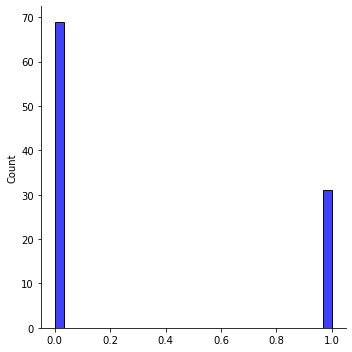

In [65]:
ax = sns.displot(data,bins=30,kde=False, color='blue')

### Binomial

In [82]:
data = binom.rvs(p=0.5,n=10,size=100)

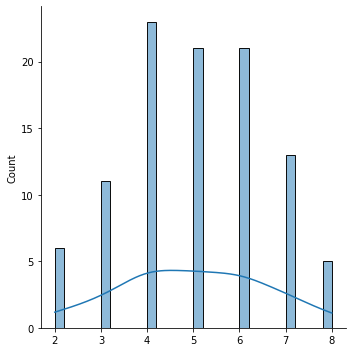

In [85]:
ax = sns.displot(data,bins=30,kde=True)

### Geometrica

In [6]:
data = geom.rvs(p=0.5,size=1000)

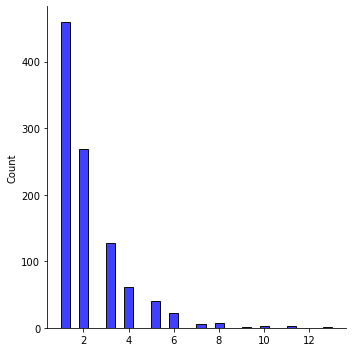

In [7]:
ax = sns.displot(data,bins=30,kde=False, color='blue')

### Binomial negativa

<ul>
    <li>Se realizan repeticiones independientes de un proceso Bernoulli, hasta obtener “k” aciertos.</li>
    <li>Interesa determinar la probabilidad de que se requieran “x” repeticiones para obtener los k aciertos.</li>
<ul>
   

In [52]:
data = nbinom(n=10,p=0.3).rvs(size=100)

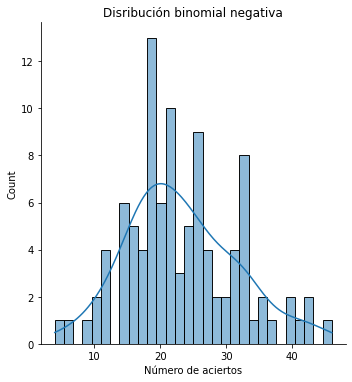

In [60]:
ax = sns.displot(data,bins=30,kde=True)
ax.set(title='Disribución binomial negativa',xlabel='Número de aciertos')

Ejemplo Para un experimento médico se requieren cinco mujeres que hayan tenido seis o más partos. La proporción de mujeres adultas con esa característica es 0.05. Suponga que se toma una muestra de mujeres adultas y sea N el número de mujeres adultas que es necesario entrevistar para encontrar las cinco buscadas.
    ¿Cuál es la probabilidad de que en diez o menos intentos se encuentren las cinco mujeres?


In [18]:
y_emb = np.arange(0,6)
prob_emb = [nbinom(n=10,p=0.05).pmf(i) for i in y_emb]

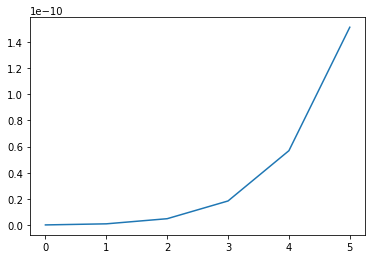

In [19]:
plt.plot(y_emb,prob_emb)

### Distribución de Poisson

In [36]:
lambda_p = 2
data = poisson.rvs(lambda_p,size=100)

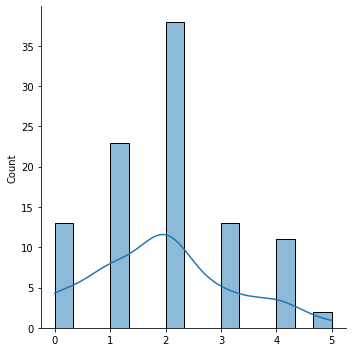

In [43]:
ax = sns.displot(data,kde=True,bins=15)